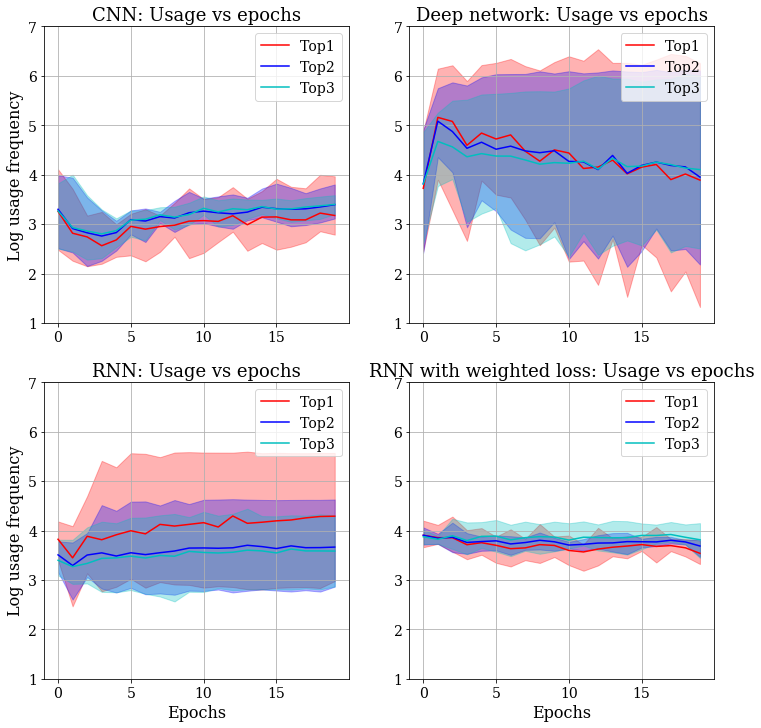

In [29]:
import numpy as np
import json
import warnings
import operator

import h5py
from keras.models import model_from_json
from keras import backend as K
from keras.utils import get_custom_objects

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

warnings.filterwarnings("ignore")

base_path = 'data/'

all_approaches_path = ['cnn_bc/', 'deep_network_bc/', 'rnn_bc/', 'rnn_custom_loss/']

titles = ['CNN: ', 'Deep network: ', 'RNN: ', 'RNN with weighted loss: ']

font = {'family': 'serif', 'size': 14}

plt.rc('font', **font)

size_title = 18
size_label = 16
n_pred = 2

runs = 5

def read_file(path):
    with open(path) as f:
        data = f.read()
        data = data.split("\n")
        data.remove('')
        data = list(map(float, data))
        return data
    
def plot_loss(x_val1, loss_tr_y1, loss_tr_y2, x_val2, loss_te_y1, loss_te_y2, title, xlabel, ylabel, leg):

    plt.figure(figsize=(9, 9))
    x_pos = np.arange(len(x_val1))
    plt.plot(x_pos, x_val1, 'r')
    plt.plot(x_pos, x_val2, 'b')
    plt.xlabel(xlabel, size=size_label)
    plt.ylabel(ylabel, size=size_label)
    plt.title(title, size=size_title)
    plt.fill_between(x_pos, loss_tr_y1, loss_tr_y2, color = 'r', alpha = 0.3)
    plt.fill_between(x_pos, loss_te_y1, loss_te_y2, color = 'b', alpha = 0.3)
    plt.legend(leg)
    plt.grid(True)
    plt.show()
    
    
def plot_usage(ax, x_val1, y1_top1, y2_top1, x_val2, y1_top2, y2_top2, x_val3, y1_top3, y2_top3, title, xlabel, ylabel, leg):
    x_pos = np.arange(len(x_val1))
    ax.plot(x_pos, x_val1, 'r')
    ax.plot(x_pos, x_val2, 'b')
    ax.plot(x_pos, x_val3, 'c')
    #ax.set_xlabel(xlabel, size=size_label)
    #ax.set_ylabel(ylabel, size=size_label)
    ax.set_title(title, size=size_title)
    ax.fill_between(x_pos, y1_top1, y2_top1, color = 'r', alpha = 0.3)
    ax.fill_between(x_pos, y1_top2, y2_top2, color = 'b', alpha = 0.3)
    ax.fill_between(x_pos, y1_top3, y2_top3, color = 'c', alpha = 0.3)
    ax.legend(leg)
    ax.set_ylim((1.0, 7.0))
    ax.grid(True)


def extract_precision(precision_path):

    top1_compatible_precision = list()
    top2_compatible_precision = list()
    top3_compatible_precision = list()
    with open(precision_path) as f:
        data = f.read()
        data = data.split("\n")
        data.remove('')
        
        for row in data:
            row = row.split('\n')
            row = row[0].split(' ')
            row = list(map(float, row))
            top1_compatible_precision.append(row[0])
            top2_compatible_precision.append(row[1])
            top3_compatible_precision.append(row[2])
    return top1_compatible_precision, top2_compatible_precision, top3_compatible_precision


def compute_fill_between(a_list):
    y1 = list()
    y2 = list()

    a_list = np.array(a_list, dtype=float)
    n_cols = a_list.shape[1]

    for i in range(0, n_cols):
        pos = a_list[:, i]
        y1.append(min(pos))
        y2.append(max(pos))
    return y1, y2


def assemble_usage():
    plt.figure(figsize=(12, 12))
    
    gs = gridspec.GridSpec(2,2)
    for idx, approach in enumerate(all_approaches_path):
        if idx == 0:
            ax = plt.subplot(gs[0,0])
            ax.set_ylabel("Log usage frequency", size=size_label)
        elif idx == 1:
            ax = plt.subplot(gs[0,1])
            
        elif idx == 2:
            ax = plt.subplot(gs[1,0])
            ax.set_xlabel("Epochs", size=size_label)
            ax.set_ylabel("Log usage frequency", size=size_label)
        else:
            ax = plt.subplot(gs[1,1])
            ax.set_xlabel("Epochs", size=size_label)
        usage_top1 = list()
        usage_top2 = list()
        usage_top3 = list()

    
        for i in range(1, runs+1):
            path = base_path + approach + 'run' + str(i) + '/'
            usage_path = path + 'usage_weights.txt'
    
            try:
                top1_p, top2_p, top3_p = extract_precision(usage_path)
                usage_top1.append(top1_p)
                usage_top2.append(top2_p)
                usage_top3.append(top3_p)
            except Exception:
                continue

        mean_top1_usage = np.mean(usage_top1, axis=0)
        mean_top2_usage = np.mean(usage_top2, axis=0)
        mean_top3_usage = np.mean(usage_top3, axis=0)

        y1_top1, y2_top1 = compute_fill_between(usage_top1)
        y1_top2, y2_top2 = compute_fill_between(usage_top2)
        y1_top3, y2_top3 = compute_fill_between(usage_top3)
        plt_title = titles[idx]
        plot_usage(ax, mean_top1_usage, y1_top1, y2_top1, mean_top2_usage, y1_top2, y2_top2, mean_top3_usage, y1_top3, y2_top3, plt_title + "Usage vs epochs", "Epochs", "Log usage", ['Top1', 'Top2', 'Top3'])
assemble_usage()




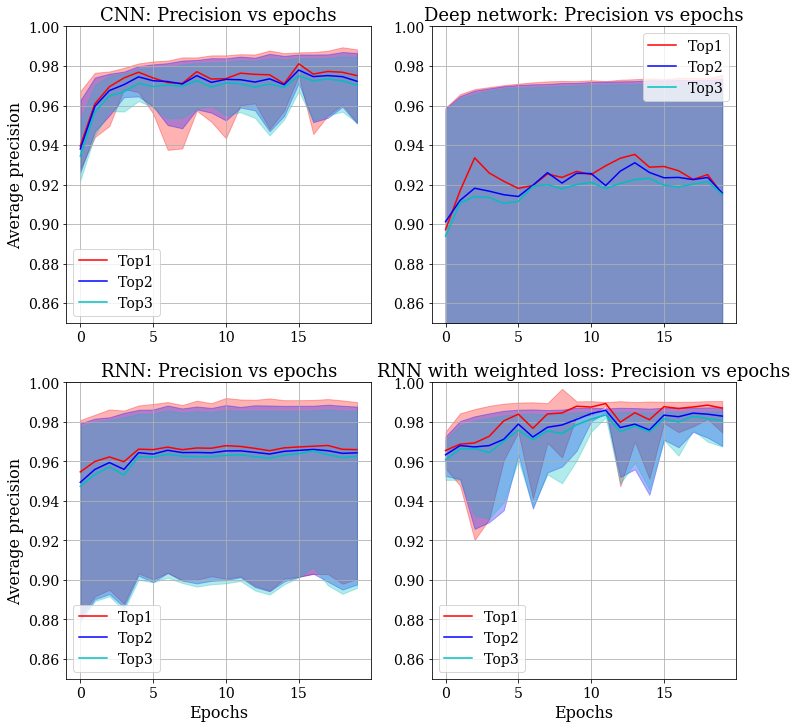

In [34]:
def plot_accuracy(ax, x_val1, y1_top1, y2_top1, x_val2, y1_top2, y2_top2, x_val3, y1_top3, y2_top3, title, xlabel, ylabel, leg):
    x_pos = np.arange(len(x_val1))
    ax.plot(x_pos, x_val1, 'r')
    ax.plot(x_pos, x_val2, 'b')
    ax.plot(x_pos, x_val3, 'c')

    ax.set_title(title, size=size_title)
    ax.fill_between(x_pos, y1_top1, y2_top1, color = 'r', alpha = 0.3)
    ax.fill_between(x_pos, y1_top2, y2_top2, color = 'b', alpha = 0.3)
    ax.fill_between(x_pos, y1_top3, y2_top3, color = 'c', alpha = 0.3)
    ax.legend(leg)
    ax.set_ylim(0.85, 1.0)
    plt.grid(True)

def assemble_accuracy():
    plt.figure(figsize=(12, 12))
    gs = gridspec.GridSpec(2,2)
    for idx, approach in enumerate(all_approaches_path):
        if idx == 0:
            ax = plt.subplot(gs[0,0])
            ax.set_ylabel("Average precision", size=size_label)
        elif idx == 1:
            ax = plt.subplot(gs[0,1])
            
        elif idx == 2:
            ax = plt.subplot(gs[1,0])
            ax.set_xlabel("Epochs", size=size_label)
            ax.set_ylabel("Average precision", size=size_label)
        else:
            ax = plt.subplot(gs[1,1])
            ax.set_xlabel("Epochs", size=size_label)

        precision_acc_top1 = list()
        precision_acc_top2 = list()
        precision_acc_top3 = list()

        for i in range(1, runs+1):
            path = base_path + approach + 'run' + str(i) + '/'
            precision_path = path + 'precision.txt'
    
            try:
                top1_p, top2_p, top3_p = extract_precision(precision_path)
                precision_acc_top1.append(top1_p)
                precision_acc_top2.append(top2_p)
                precision_acc_top3.append(top3_p)
            except Exception:
                continue

        mean_top1_acc = np.mean(precision_acc_top1, axis=0)
        mean_top2_acc = np.mean(precision_acc_top2, axis=0)
        mean_top3_acc = np.mean(precision_acc_top3, axis=0)

        y1_top1, y2_top1 = compute_fill_between(precision_acc_top1)
        y1_top2, y2_top2 = compute_fill_between(precision_acc_top2)
        y1_top3, y2_top3 = compute_fill_between(precision_acc_top3)
        plt_title = titles[idx]
        plot_accuracy(ax, mean_top1_acc, y1_top1, y2_top1, mean_top2_acc, y1_top2, y2_top2, mean_top3_acc, y1_top3, y2_top3, plt_title + "Precision vs epochs", "Epochs", "Precision", ['Top1', 'Top2', 'Top3'])
assemble_accuracy()